In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# Set font family to SimHei (or other Chinese-supported font)
rcParams['font.sans-serif'] = ['SimHei']  # Use SimHei for Chinese
rcParams['axes.unicode_minus'] = False   # Ensure minus sign renders correctly
times_new_roman = FontProperties(family='Times New Roman')  # 直接使用 Times New Roman


In [2]:
# download china.topo.json from https://geojson.cn/data/atlas/china
# https://geojson.cn/api/china/china.topo.json
china_map = gpd.read_file('china.topo.json')


Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3


In [3]:
china_map.head()

,id,name,childrenNum,level,code,filename,fullname,geometry
0,None,北京,16.0,province,110000.0,110000,北京市,"MULTIPOLYGON (((117.34861 40.58114, 117.34861 ..."
1,None,天津,16.0,province,120000.0,120000,天津市,"MULTIPOLYGON (((117.7656 39.40053, 117.6997 39..."
2,None,河北,11.0,province,130000.0,130000,河北省,"MULTIPOLYGON (((117.46749 40.64974, 117.46749 ..."
3,None,山西,11.0,province,140000.0,140000,山西省,"MULTIPOLYGON (((110.37926 34.60061, 110.29549 ..."
4,None,内蒙古,12.0,province,150000.0,150000,内蒙古自治区,"POLYGON ((97.1729 42.79526, 97.28254 42.78208,..."


In [5]:
data = pd.read_csv('data.csv')


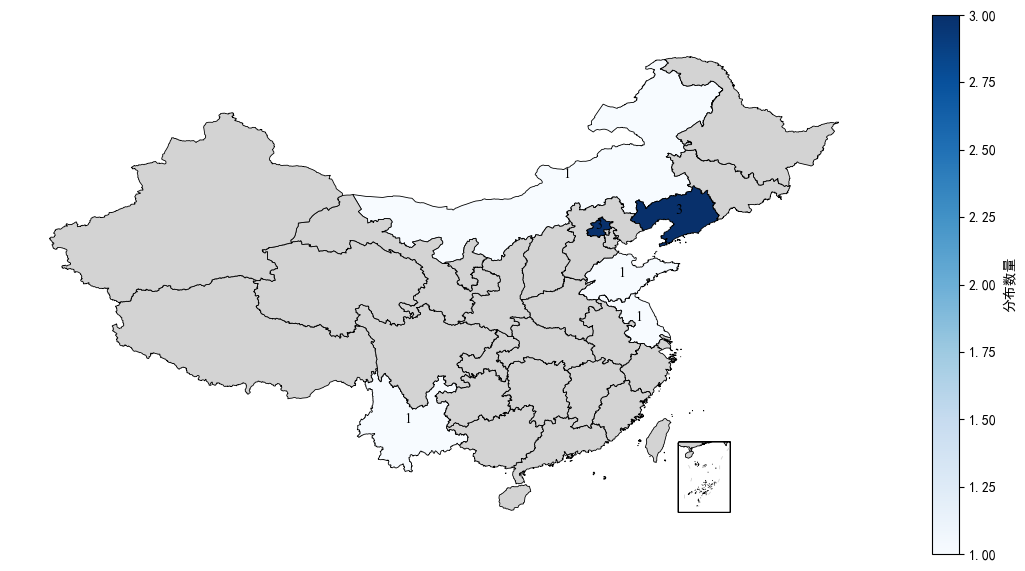

In [6]:
# 2. 创建示例数据
data = pd.read_csv('data.csv')
province_city_data = pd.DataFrame()
province_city_data[['name', 'city']] = data["您的主要生活城市"].str.split('-', expand=True)

province_counts = province_city_data['name'].value_counts().reset_index()
province_counts.columns = ['name', 'value']

# 计算每个省的平均值
province_data = province_counts.groupby('name')['value'].mean().reset_index()

# 3. 合并地图数据和统计数据
new_china_map = china_map.merge(province_data, on='name', how='left')

# 4. 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
new_china_map.plot(
    column='value',
    cmap='Blues',
    linewidth=0.6,
    edgecolor='k',
    legend=True,
    legend_kwds={
        'shrink': 0.5,  # 缩小图例
        'label': "分布数量",  # 图例标签
        'orientation': 'vertical',
        # 'prop': times_new_roman  # 图例字体
    },
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# 添加省份名称和数据标签
# chinese_font = FontProperties(fname='/path/to/SimHei.ttf')
for idx, row in new_china_map.iterrows():
    if pd.notna(row['value']):
        # delta = 0.35
        delta = 0
        if row['name'] == "河北":
            delta = 1.5
        elif row['name'] == "北京":
            delta = -0.1
        elif row['name'] == "天津":
            delta = -0.2
        elif row['name'] == "甘肃":
            delta = 0.4
        plt.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y + delta,
            f"{int(row['value'])}",
            fontsize=10,
            ha='center',
            fontproperties=times_new_roman,  # 数字使用 Times New Roman
            # color='black'
        )
# 美化和标题
# plt.title("China Province Data Visualization", fontsize=20, pad=20)
# plt.title("中", fontsize=20, pad=20, loc="center")
plt.axis('off')
# plt.tight_layout()

# plt.show()
# save
plt.savefig('china_province_data_visualization.png', dpi=300, bbox_inches='tight')